In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%cd /content/drive/My Drive/

Mounted at /content/drive
/content/drive/My Drive


## **Read Dataset and check basic descriptive statistics**

In [3]:
df = pd.read_csv('Bank_Churn/train.csv')
df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# Check datatypes, 11 quantitative, 3 categorical
data_type_counts = df.dtypes.value_counts()
print(data_type_counts)

int64      6
float64    5
object     3
Name: count, dtype: int64


## **Check missing value and outliers, train test split & drop irrelevant features**

In [6]:
#Null Value Columns, no null value
nullseries= df.isna().sum()
print(nullseries[nullseries > 0])

Series([], dtype: int64)


In [7]:
#Drop irrelevant variables
x = df.drop(columns=['Exited','id', 'CustomerId' ,'Surname'])
y = df['Exited']

# Use K-Fold during Model Training stage
from sklearn.model_selection import train_test_split
# Split the dataset into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

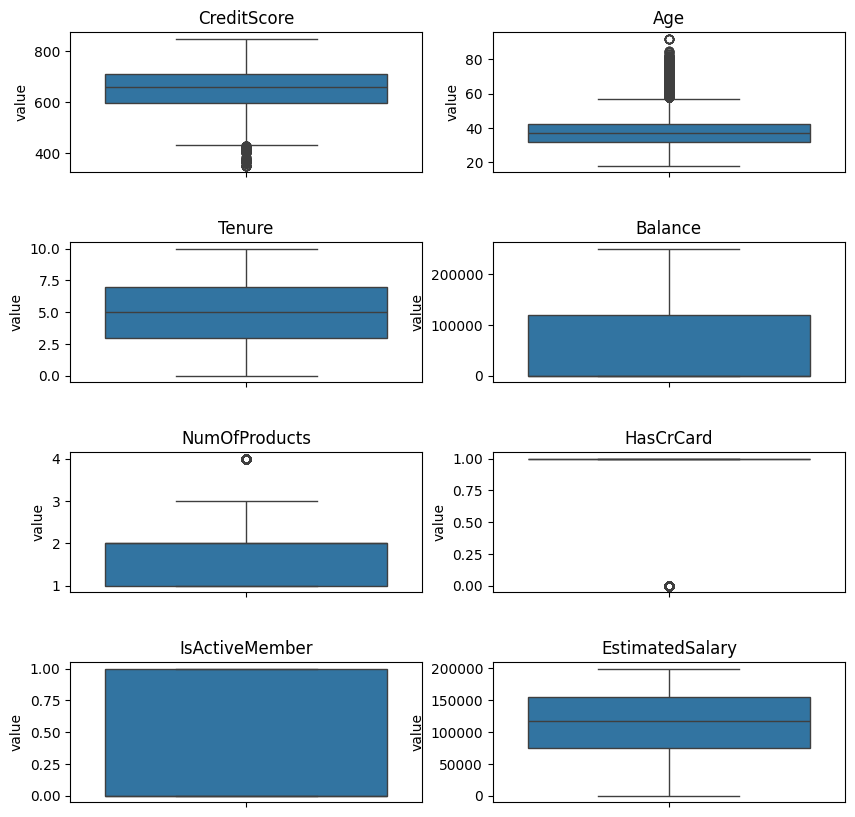

In [8]:
# Check outliers
import numpy as np
x_numeric = x_train.select_dtypes(include=['int64', 'float64'])

numeric_variable = x_numeric.columns.to_list()

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(10,10))

for idx, col in enumerate(numeric_variable):
    row = idx // 2
    cols = idx % 2
    ax = axes[row,cols]
    sns.boxplot(x_numeric[col],ax=ax)
    ax.set_title(f'{col}')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    ax.set_xlabel('')  # Remove x-axis label for better clarity
    ax.set_ylabel('value')
    plt.subplots_adjust(hspace=0.5)  # Add vertical spacing between subplots

#There are outliers for some variables. We should drop those with too many number of products. We should keep outliers as they are normal not

## **Exploratory Data Analysis**

<ipython-input-9-094b3b1bcded>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=correlation_matrix.index, y=correlation_matrix, palette='coolwarm')
<ipython-input-9-094b3b1bcded>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels


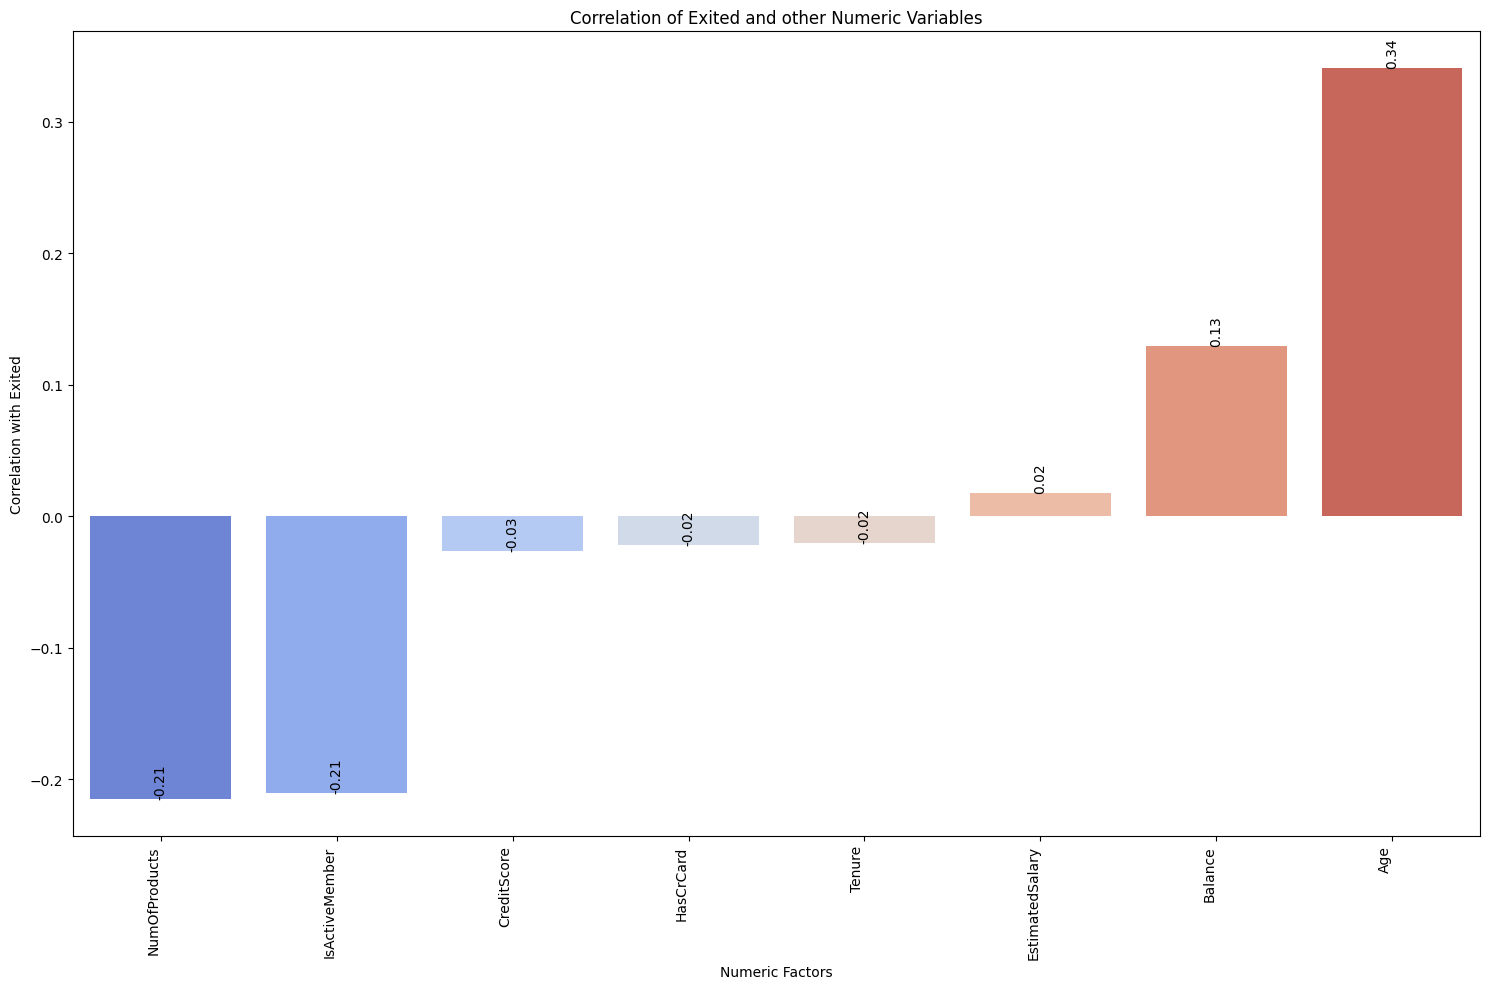

In [9]:
#Create heat map of all numeric variables
# Select only numeric variables
x_numeric = x_train.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
train_data = pd.concat([x_numeric, y], axis=1)
correlation_matrix = train_data.corr()
correlation_matrix = correlation_matrix['Exited'].drop('Exited').sort_values()
correlation_matrix=correlation_matrix.sort_values()

# Plot barplot for correlation
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x=correlation_matrix.index, y=correlation_matrix, palette='coolwarm')
plt.title('Correlation of Exited and other Numeric Variables')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels
plt.xlabel('Numeric Factors')
plt.ylabel('Correlation with Exited')
for index, value in enumerate(correlation_matrix):
    plt.text(index, value, f'{value:.2f}', rotation=90, ha='center', va='bottom')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

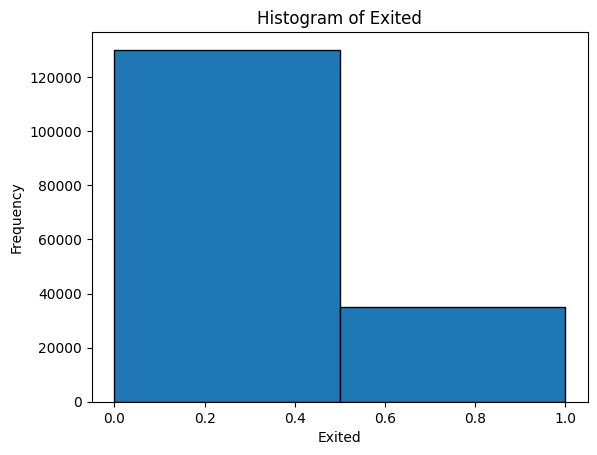

In [10]:
#Create Histogram
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Exited' is the column name
plt.hist(df['Exited'], bins=2, edgecolor='black')  # Assuming binary data, adjust 'bins' as needed
plt.xlabel('Exited')
plt.ylabel('Frequency')
plt.title('Histogram of Exited')
plt.show()

['Geography', 'Gender']


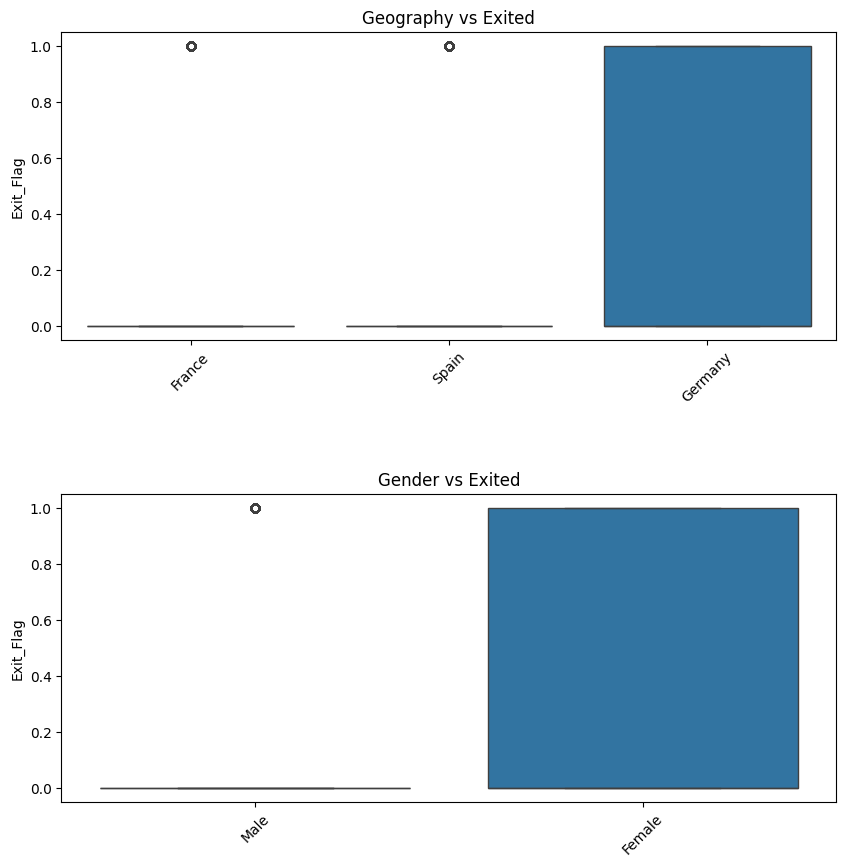

In [11]:
x_categorical = x_train.select_dtypes(include=['object'])
categorical_variable = x_categorical.columns.tolist()
print(categorical_variable)

import numpy as np

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for idx, col in enumerate(categorical_variable):
    ax = axes[idx]
    sns.boxplot(x=x_categorical[col], y=y_train,ax=ax)
    ax.set_title(f'{col} vs Exited')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    ax.set_xlabel('')  # Remove x-axis label for better clarity
    ax.set_ylabel('Exit_Flag')
    plt.subplots_adjust(hspace=0.5)  # Add vertical spacing between subplots

## **Feature Engineering**

In [12]:
#Feature Engineering: Step 1 One Key Encoding Categorical Variable to boolean column
x_encoded = pd.get_dummies(x_train)
x_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
149380,679,41.0,9,0.00,2,1.0,1.0,103560.98,True,False,False,False,True
164766,721,46.0,9,115764.32,2,1.0,0.0,102950.79,True,False,False,False,True
155569,551,35.0,5,0.00,1,1.0,0.0,155394.52,True,False,False,False,True
124304,743,31.0,3,57866.03,2,1.0,1.0,107428.42,False,False,True,True,False
108008,675,28.0,2,0.00,2,1.0,0.0,134110.93,True,False,False,False,True
